In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
imgs = [cv.cvtColor(cv.imread(f, cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
        for f in ['lab2_1.jpg', 'lab2_2.jpg']]

In [ ]:
def show(img):
  plt.figure(figsize=(15, 5))
  plt.imshow(img)

In [ ]:
def deform(img, x1, x2, y1, y2):
  return img[x1:x2, y1:y2]

In [ ]:
def cv_matcher(image, deformed, matches_number):

  fast = cv.FastFeatureDetector_create()
  orb = cv.ORB_create()

  kp1 = fast.detect(cv.cvtColor(image, cv.COLOR_BGR2GRAY), None)
  kp2 = fast.detect(cv.cvtColor(deformed, cv.COLOR_BGR2GRAY), None)

  kp1, des1 = orb.compute(cv.cvtColor(image, cv.COLOR_BGR2GRAY), kp1)
  kp2, des2 = orb.compute(cv.cvtColor(deformed, cv.COLOR_BGR2GRAY), kp2)

  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1, des2)

  matches = sorted(matches, key=lambda x: x.distance)

  return cv.drawMatches(image, kp1, deformed, kp2, matches[:matches_number], None, flags=2)

In [ ]:
def custom_matcher(image, deformed, matches_number):

  fast = cv.FastFeatureDetector_create(40)
  orb = cv.ORB_create()

  kp1 = fast.detect(cv.cvtColor(image, cv.COLOR_BGR2GRAY), None)
  kp2 = fast.detect(cv.cvtColor(deformed, cv.COLOR_BGR2GRAY), None)

  kp1, des1 = orb.compute(cv.cvtColor(image, cv.COLOR_BGR2GRAY), kp1)
  kp2, des2 = orb.compute(cv.cvtColor(deformed, cv.COLOR_BGR2GRAY), kp2)

  matches = []
  for i, d1 in enumerate(des1, start=0):
    for j, d2 in enumerate(des2, start=0):
      matches.append(cv.DMatch(_trainIdx=j, _queryIdx=i, _distance=float(np.sum(d1 ^ d2)), _imgIdx=0))

  matches = sorted(matches, key=lambda x: x.distance)

  return cv.drawMatches(image, kp1, deformed, kp2, matches[:matches_number], None, flags=2)

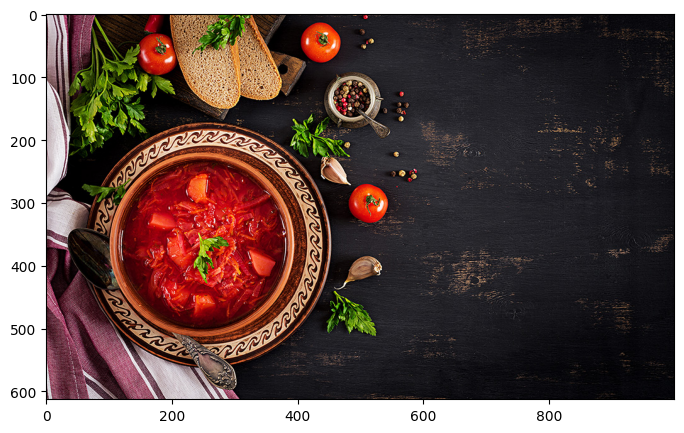

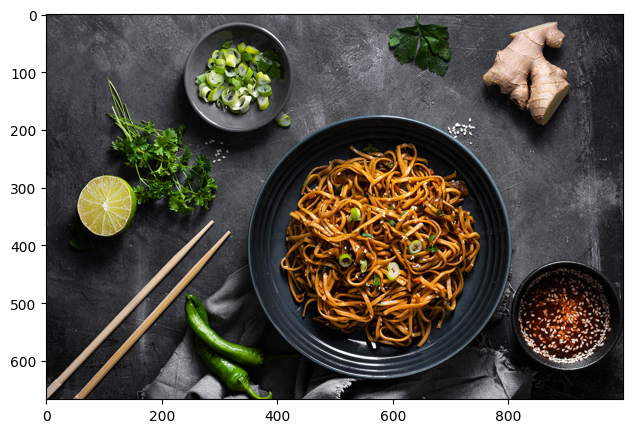

In [ ]:
for img in imgs:
  show(img)

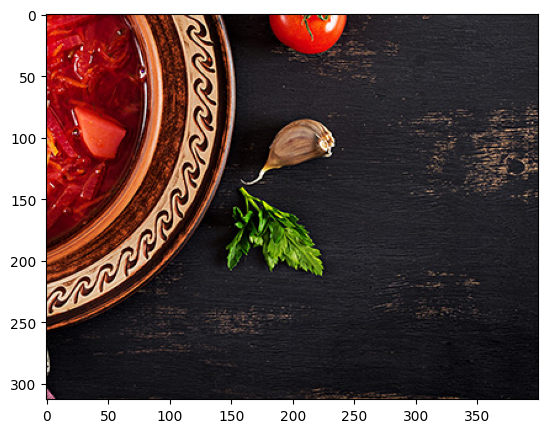

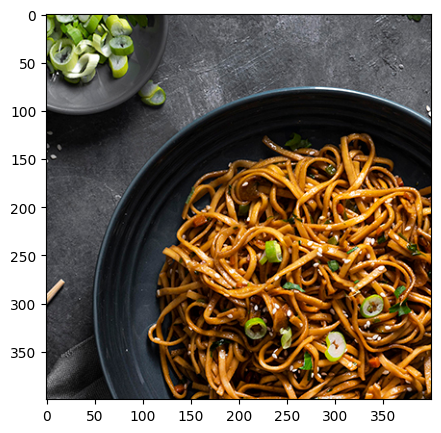

In [ ]:
deform_imgs = []
deform_imgs.append(deform(imgs[0], 300, 800, 300, 700))
deform_imgs.append(deform(imgs[1], 100, 500, 300, 700))

for img in deform_imgs:
  show(img)

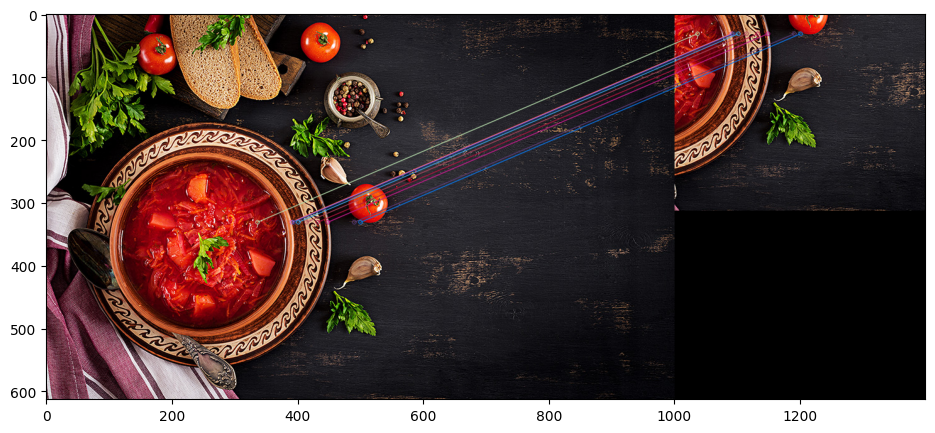

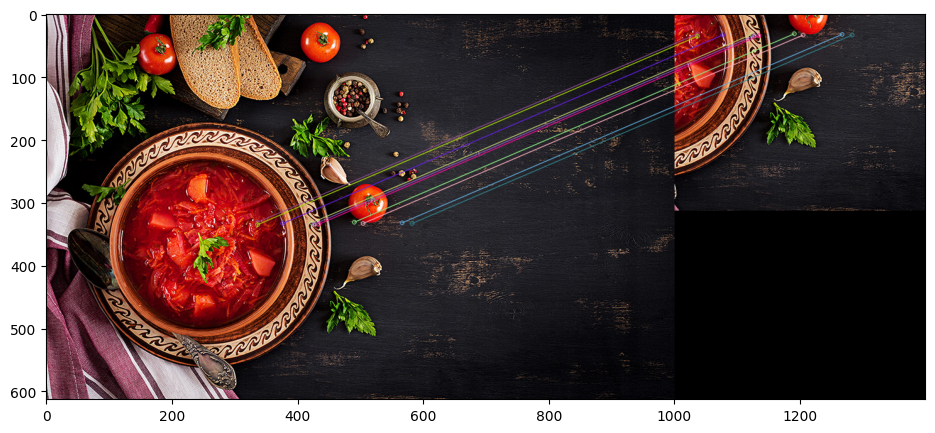

In [ ]:
show(cv_matcher(image=imgs[0], deformed=deform_imgs[0], matches_number=10))
show(custom_matcher(image=imgs[0], deformed=deform_imgs[0], matches_number=10))

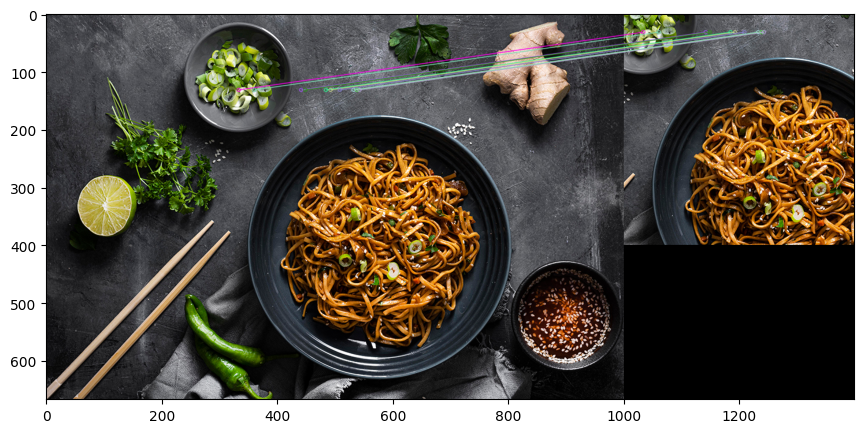

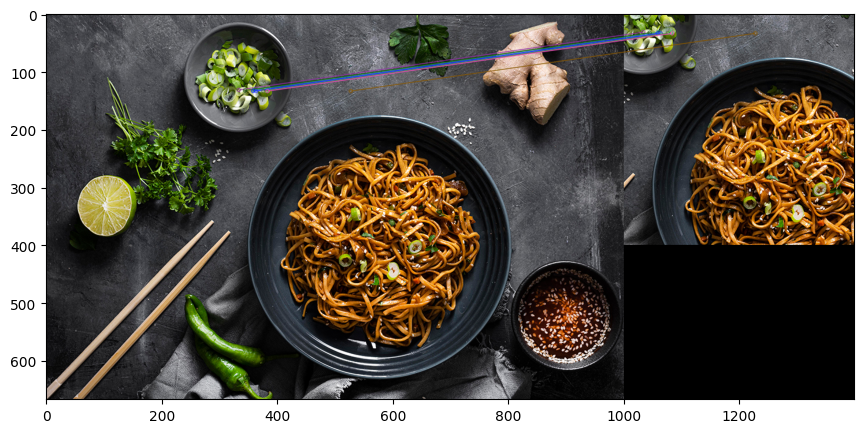

In [ ]:
show(cv_matcher(image=imgs[1], deformed=deform_imgs[1], matches_number=10))
show(custom_matcher(image=imgs[1], deformed=deform_imgs[1], matches_number=10))